# 📦 1. Imports and Data Loading

In [1]:
# Importing essential libraries
import numpy as np  # Numerical computing
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Plotting
import seaborn as sb  # Advanced plotting with seaborn

In [2]:
# Load the dataset
df = pd.read_csv("C:/Users/ajinv/Downloads/p7 - data.csv")

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## 🧹 2. Data Cleaning and Column Fixes

In [4]:
# Rename the No-show column to 'visiting'
df.rename(columns={'No-show': 'visiting'}, inplace=True)

# Convert No/Yes to binary meaning
df['visiting'][df['visiting'] == 'No'] = 'yes'
df['visiting'][df['visiting'] == 'Yes'] = 'no'

C:\Users\ajinv\AppData\Local\Temp\ipykernel_6200\2275258622.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['visiting'][df['visiting'] == 'No'] = 'yes'
C:\Users\ajinv\AppData\Local\Temp\ipykernel_6200\2275258622.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['visiting'][df['visiting'] == 'Yes'] = 'no'


In [5]:
df['visiting'].value_counts()

visiting
yes    88208
no     22319
Name: count, dtype: int64

In [6]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,visiting
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,yes
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,yes
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,yes
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,yes
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,yes


## 🔍 3. Null Handling and Data Types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110517 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  visiting        110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
df.isnull().sum()

PatientId          0
AppointmentID      0
Gender             0
ScheduledDay       0
AppointmentDay     0
Age                0
Neighbourhood     10
Scholarship        0
Hipertension       0
Diabetes           0
Alcoholism         0
Handcap            0
SMS_received       0
visiting           0
dtype: int64

In [9]:
drop_index = df[df['Neighbourhood'].isnull()].index

In [10]:
df.drop(drop_index, axis=0, inplace=True)

In [11]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
visiting          0
dtype: int64

## 🧾 4. Value Exploration and Encoding

In [12]:
print(df['Hipertension'].unique())
print(df['Diabetes'].unique())
print(df['Alcoholism'].unique())
print(df['Handcap'].unique())
print(df['SMS_received'].unique())
print(df['Scholarship'].unique())

[1 0]
[0 1]
[0 1]
[0 1 2 3 4]
[0 1]
[0 1]


In [13]:
df[df['Handcap']==4]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,visiting
91820,9.251880e+12,5789549,M,2016-06-08T15:14:00Z,2016-06-08T00:00:00Z,15,DA PENHA,0,0,0,0,4,0,yes
98538,4.972460e+14,5760621,M,2016-06-01T15:11:25Z,2016-06-03T00:00:00Z,19,SÃO PEDRO,0,0,0,0,4,0,yes
104268,7.581890e+14,5697136,F,2016-05-13T15:01:17Z,2016-06-02T00:00:00Z,9,ITARARÉ,0,0,0,0,4,1,no


## 📏 5. Outlier Detection: Age

In [14]:
df.describe()['Age']

count    110517.000000
mean         37.089027
std          23.110793
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

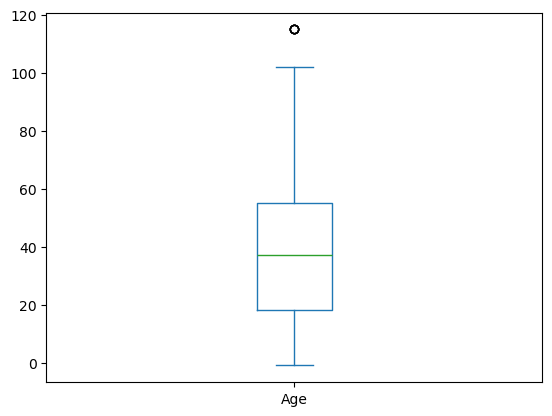

In [15]:
df['Age'].plot(kind='box');

In [16]:
q1, q2, q3 = np.quantile(df['Age'], [0.25, 0.5, 0.75])

In [17]:
diff = q3 - q1
q3 + 1.5 * diff

110.5

In [18]:
print('age of greater than 110 is {}'.format(sum(df['Age'] > 110)))
print('age of less than 1 is {}'.format(sum(df['Age'] < 0)))

age of greater than 110 is 5
age of less than 1 is 1


In [19]:
drop_index2 = df[np.logical_or(df['Age'] > 110, df['Age'] < 0)].index

In [20]:
df.drop(drop_index2, axis=0, inplace=True)

## 🧠 6. Data Encoding and Duplicates

In [21]:
df['Gender'] = df['Gender'].astype('category')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110511 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   PatientId       110511 non-null  float64 
 1   AppointmentID   110511 non-null  int64   
 2   Gender          110511 non-null  category
 3   ScheduledDay    110511 non-null  object  
 4   AppointmentDay  110511 non-null  object  
 5   Age             110511 non-null  int64   
 6   Neighbourhood   110511 non-null  object  
 7   Scholarship     110511 non-null  int64   
 8   Hipertension    110511 non-null  int64   
 9   Diabetes        110511 non-null  int64   
 10  Alcoholism      110511 non-null  int64   
 11  Handcap         110511 non-null  int64   
 12  SMS_received    110511 non-null  int64   
 13  visiting        110511 non-null  object  
dtypes: category(1), float64(1), int64(8), object(4)
memory usage: 11.9+ MB


In [23]:
df.duplicated().sum()

0

## 🧪 7. Illness Column Melting

In [24]:
first_ill = list(df.columns).index('Hipertension')

In [25]:
list_illness = df.columns[first_ill:first_ill+4]

In [26]:
list_other = [i for i in df.columns if i not in list_illness]

In [27]:
df1 = pd.melt(df, id_vars=list_other, value_vars=list_illness, var_name='illness', value_name='illness_code')

In [28]:
df1.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,SMS_received,visiting,illness,illness_code
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,0,yes,Hipertension,1
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,yes,Hipertension,0
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,yes,Hipertension,0
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,yes,Hipertension,0
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,yes,Hipertension,1


## 🕒 8. Time Difference Feature Engineering

In [29]:
df['ScheduledDay'] = df['ScheduledDay'].apply(lambda x: pd.to_datetime(x))

In [30]:
df['AppointmentDay'] = df['AppointmentDay'].apply(lambda x: pd.to_datetime(x))

In [31]:
df['diff_time'] = df['AppointmentDay'] - df['ScheduledDay']

In [32]:
df['diff_time'] = df['diff_time'].apply(lambda x: int(str(x).split(' ')[0]) + 1)

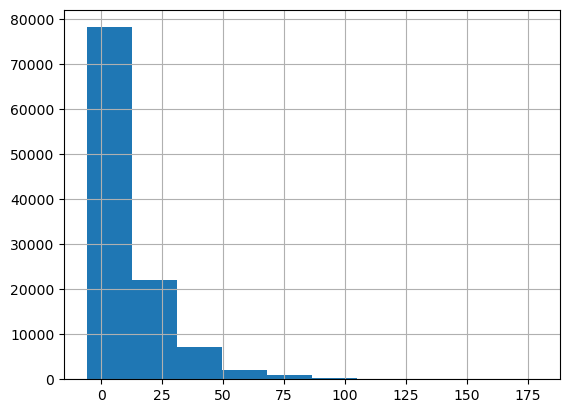

In [33]:
df['diff_time'].hist();

## 👥 9. Gender and Visit Analysis

C:\Users\ajinv\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


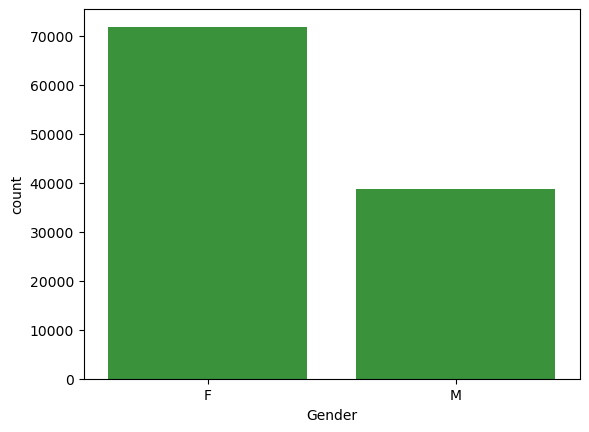

In [34]:
sb.countplot(data=df, x='Gender', color=sb.color_palette()[2]);

In [35]:
a = df.groupby(['Gender']).count()['PatientId']

C:\Users\ajinv\AppData\Local\Temp\ipykernel_6200\2847952003.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a = df.groupby(['Gender']).count()['PatientId']


In [36]:
b = df.groupby(['Gender','visiting']).count()['PatientId']

C:\Users\ajinv\AppData\Local\Temp\ipykernel_6200\739043422.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  b = df.groupby(['Gender','visiting']).count()['PatientId']


In [37]:
df_report = (b / a).round(3).reset_index().rename(columns={'PatientId':'percent_visit'})

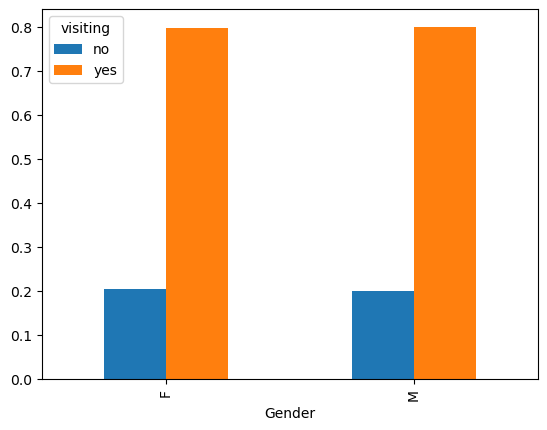

In [38]:
pd.pivot_table(data=df_report, index='Gender', columns='visiting', values='percent_visit', aggfunc='sum').plot(kind='bar');

## 📆 10. Day-of-Week Visit Analysis

In [39]:
df['visiting_day'] = df['ScheduledDay'].apply(lambda x: x.day_name())

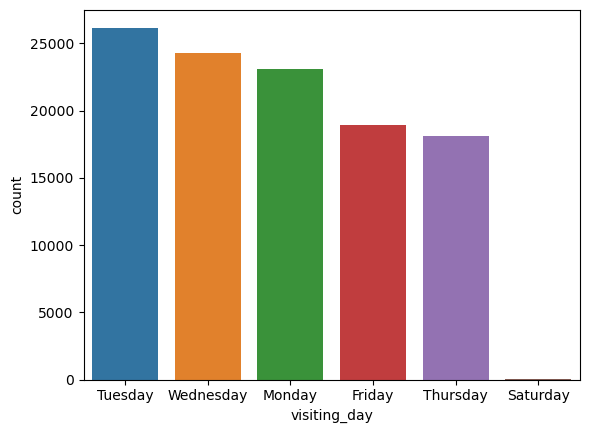

In [40]:
sb.countplot(data=df , x='visiting_day' , order=df['visiting_day'].value_counts().index);

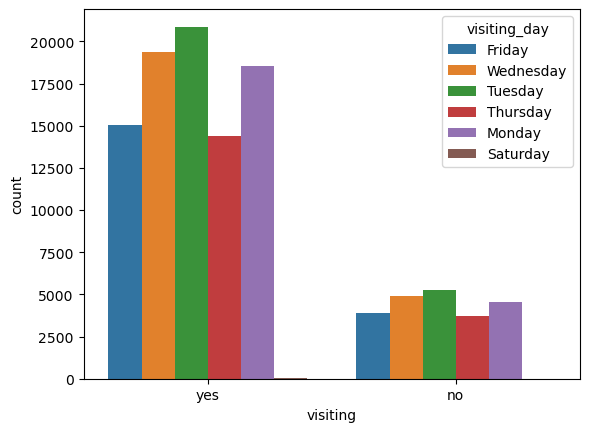

In [41]:
sb.countplot(data=df , x='visiting' , hue='visiting_day');

## 📊 11. Age Distribution of Visitors

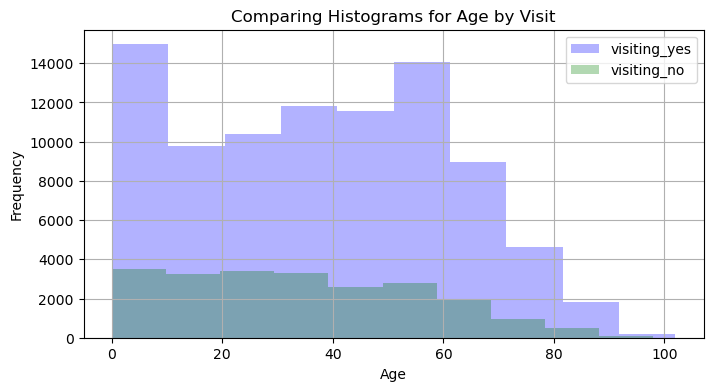

In [42]:
plt.figure(figsize=(8, 4))
df['Age'][df['visiting']=='yes'].plot(kind='hist', color='b', alpha=0.3)
df['Age'][df['visiting']=='no'].plot(kind='hist', color='g', alpha=0.3)
plt.legend(['visiting_yes', 'visiting_no'])
plt.title('Comparing Histograms for Age by Visit')
plt.xlabel('Age')
plt.grid()
plt.show()

## 🏥 12. Illness by Gender and Age Group

In [43]:
df_ill = df[['Gender','Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']]

C:\Users\ajinv\AppData\Local\Temp\ipykernel_6200\91408715.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_ill.iloc[:,1:].groupby(['Gender']).sum().plot(kind='bar');


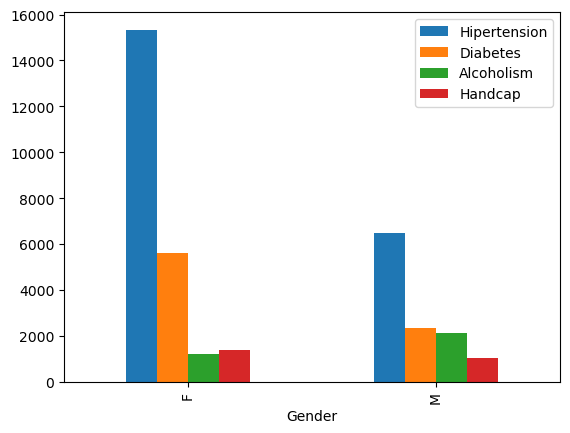

In [44]:
df_ill.index = df_ill['Gender']
df_ill.iloc[:,1:].groupby(['Gender']).sum().plot(kind='bar');

In [45]:
df['age_category'] = pd.cut(df['Age'], labels=['category_%i' % i for i in range(1,8)], bins=[-1,15,30,45,60,75,90,103])

In [46]:
df_ill2 = df[['age_category','Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']]

C:\Users\ajinv\AppData\Local\Temp\ipykernel_6200\2294606152.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_ill2.groupby(['age_category']).sum().plot(kind='bar', figsize=(5,4))


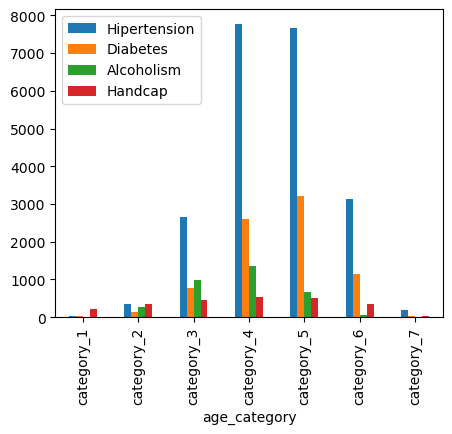

In [47]:
df_ill2.groupby(['age_category']).sum().plot(kind='bar', figsize=(5,4))
plt.show()

## 🏘️ 13. Neighborhood vs Visit Status

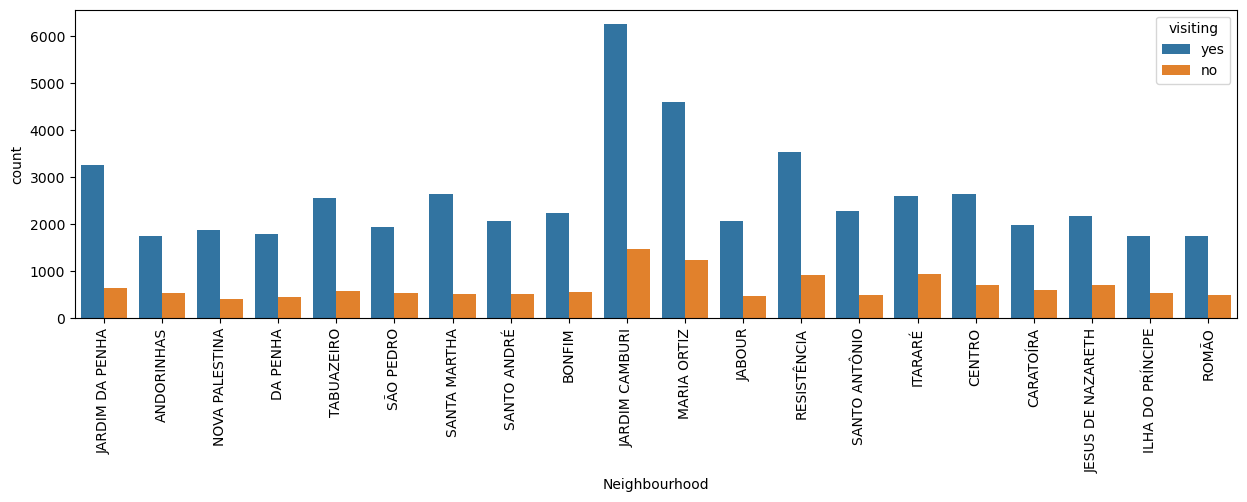

In [48]:
list_location = df['Neighbourhood'].value_counts()[:20].index
df_loc = df[df['Neighbourhood'].isin(list_location)]

plt.figure(figsize=(15,4))
sb.countplot(data=df_loc , x='Neighbourhood' , hue='visiting')
plt.xticks(rotation=90)
plt.show()